In [17]:
import pandas as pd
import numpy as np 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.impute import SimpleImputer
train=pd.read_csv('/kaggle/input/train-data1/final_all_data.csv')
test=pd.read_csv('/kaggle/input/ml-olympiad-co2-emissions-prediction-challenge/test.csv')
rmse= pd.read_csv('/kaggle/input/country-data3/country_data.csv')
submission= pd.read_csv('/kaggle/input/submission1/access65.csv')
train = train[train['Year'] != 2021]


In [18]:
# rmse= pd.read_csv('/kaggle/input/country-data/country_data.csv')

# Handle country name 

In [19]:

unique_values = test['Country Name'].unique()


In [20]:
sample_submission=submission[['Country Name','2016 [YR2016]','2017 [YR2017]','2018 [YR2018]','2019 [YR2019]','2020 [YR2020]']]

# Trian dataset er size thik 

In [21]:
import pandas as pd

last_5_years_df = pd.DataFrame()

# Iterate over each country in the final_df DataFrame
for country in train['Country Name'].unique():
    # Get the last 5 rows for the current country
    last_5_rows = train[train['Country Name'] == country].tail(21)
    # Append the last 5 rows to the DataFrame
    last_5_years_df = pd.concat([last_5_years_df, last_5_rows])



train=last_5_years_df

train.reset_index(drop=True, inplace=True)

# Test Data size 

In [22]:
test=test.drop(columns=['Country Name'],axis =1 )


In [23]:
import numpy as np

# Calculate the number of iterations needed
num_iterations = len(test) // 11

# List to store transposed DataFrames
transposed_dfs = []

# Iterate through the DataFrame in chunks of 11 rows
for i in range(num_iterations):
    start_idx = i * 11
    end_idx = (i + 1) * 11
    subset_df = test.iloc[start_idx:end_idx]
    transposed_subset_df = subset_df.transpose()
    transposed_dfs.append(transposed_subset_df)
    transposed_subset_df.columns = range(11)

# Concatenate the transposed DataFrames
final_test_df = pd.concat(transposed_dfs)

# Reset the index
final_test_df.reset_index(drop=True, inplace=True)






# Filter out rows containing the specified string
final_test_df = final_test_df[~final_test_df.apply(lambda row: 'Access to electricity (% of population)' in row.values, axis=1)]

# Reset the index after dropping rows
final_test_df.reset_index(drop=True, inplace=True)






column_names = [
    'Access to electricity (% of population)',
    'Agricultural land (% of land area)',
    'Annual freshwater withdrawals, total (% of internal resources)',
    'Arable land (% of land area)',
    'Forest area (% of land area)',
    'Electric power consumption (kWh per capita)',
    'Energy use (kg of oil equivalent per capita)',
    'Renewable electricity output (% of total electricity output)',
    'Renewable energy consumption (% of total final energy consumption)',
    'Population growth (annual %)',
    'GDP per capita (current US$)',
]

# Rename columns of final_df
final_test_df.columns = column_names


final_test_df = final_test_df.apply(pd.to_numeric, errors='coerce')

final_test_df = final_test_df.astype(float)
final_test_df['Country Name'] = ''


# List of country names to delete
countries_to_delete = ['American Samoa', 'Kosovo', 'Namibia', 'West Bank and Gaza', 'Not classified']



for i in range(len(final_test_df) // 5):
    start_idx = i * 5
    end_idx = (i + 1) * 5
    final_test_df.loc[start_idx:end_idx - 1, 'Country Name'] = unique_values[i]




# which columns is more better for co2

In [24]:
# correlation_matrix = train.drop('Country Name' , axis =1 ).corr()
# co2_corr = correlation_matrix['CO2 emissions (metric tons per capita)'].abs().sort_values(ascending=False)
# print(co2_corr)


In [25]:
# train.isnull().sum()

In [26]:
# final_test_df.isnull().sum()

# RMSE file create 

In [27]:
# Drop columns from 1960 to 1999 and Unnamed: 67, 2021, 2022
columns_to_drop = [str(year) for year in range(1960, 2016)] + ['Unnamed: 67', '2021', '2022','Country Code','Indicator Name','Indicator Code']
rmse = rmse.drop(columns=columns_to_drop)


# sample_submission=sample_submission.drop('2030 [YR2030]',axis =1 )

rmse['2016 [YR2016]']=rmse['2016']
rmse['2017 [YR2017]']=rmse['2017']
rmse['2018 [YR2018]']=rmse['2018']
rmse['2019 [YR2019]']=rmse['2019']
rmse['2020 [YR2020]']=rmse['2020']
rmse=rmse.drop(columns=['2016','2017','2018','2019','2020'],axis =1 )






# RMSE value count 

In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Create an empty dictionary to store RMSE values
rmse_values = {}

# Iterate over each row in the sample_submission DataFrame
for index, row in sample_submission.iterrows():
    # Extract country name
    country_name = row['Country Name']
    
    # Extract predicted values from the sample_submission DataFrame
    predicted_values = row[['2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']]
    
    # Locate the corresponding row in the rmse DataFrame
    real_values_row = rmse[rmse['Country Name'] == country_name]
    
    # Ensure there is a corresponding row in the rmse DataFrame
    if not real_values_row.empty:
        # Extract real values for years 2016 to 2020
        real_values = real_values_row.iloc[:, 1:].values.squeeze()
        
        # Calculate RMSE only if real_values is not empty
        if not np.isnan(real_values).all():
            # Calculate RMSE
            rmse_value = np.sqrt(mean_squared_error(real_values, predicted_values))
            
            # Store RMSE value in the dictionary
            rmse_values[country_name] = rmse_value

# Convert the dictionary to a DataFrame
rmse_df = pd.DataFrame(list(rmse_values.items()), columns=['Country Name', 'RMSE'])



average_rmse = rmse_df['RMSE'].mean()
print("Average RMSE:", average_rmse)

Average RMSE: 0.2055637458067752


# RMSE value analysis 

In [29]:
rmse 

,Country Name,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Aruba,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,0.941337,0.933874,0.921453,0.915294,0.795420
2,Afghanistan,0.268359,0.281196,0.299083,0.297564,0.223479
3,Africa Western and Central,0.479775,0.465166,0.475817,0.490837,0.463150
4,Angola,1.012552,0.829723,0.755828,0.753638,0.592743
...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",0.342802,0.322370,0.368614,0.354864,0.308515
263,South Africa,7.544590,7.683708,7.667377,7.688908,6.687563
264,Zambia,0.316995,0.393726,0.440527,0.414336,0.401903


In [30]:
countries_with_null = rmse[rmse.isnull().any(axis=1)]['Country Name']
(countries_with_null)


0                          Aruba
11                American Samoa
27                       Bermuda
38               Channel Islands
51                       Curacao
52                Cayman Islands
78                 Faroe Islands
84                     Gibraltar
91                     Greenland
93                          Guam
96          Hong Kong SAR, China
108                  Isle of Man
110               Not classified
146             Macao SAR, China
147     St. Martin (French part)
149                       Monaco
164     Northern Mariana Islands
172                New Caledonia
192                  Puerto Rico
196           West Bank and Gaza
199             French Polynesia
212                   San Marino
225    Sint Maarten (Dutch part)
228     Turks and Caicos Islands
255       British Virgin Islands
256        Virgin Islands (U.S.)
261                       Kosovo
Name: Country Name, dtype: object

In [31]:
countries_with_same_values = rmse[(rmse.apply(lambda x: x.nunique(), axis=1) == 1)]['Country Name']


In [32]:
len(countries_with_same_values)

27

In [33]:
sorted_rmse_df = rmse_df.sort_values(by='RMSE', ascending=False)
sorted_rmse_df.head(10)


,Country Name,RMSE
139,Qatar,3.110276
55,Estonia,3.072333
24,Brunei Darussalam,2.937279
101,Luxembourg,2.157592
173,Trinidad and Tobago,1.924012
75,Iceland,1.748453
180,United Arab Emirates,1.534088
182,United States,1.527291
225,North America,1.456440
131,Palau,1.248617


In [48]:
# sample_submission.head(30)

In [36]:
rmse.loc[rmse['Country Name'] == 'Aruba', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [7.620352, 7.620352, 7.438915, 7.620352, 7.620352]
rmse.loc[rmse['Country Name'] == 'American Samoa', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = ['NaN', 'NaN', 'NaN', 'NaN', 'NaN']
rmse.loc[rmse['Country Name'] == 'Bermuda', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [8.89041, 9.071847, 9.888314, 8.436818, 6.53173]
rmse.loc[rmse['Country Name'] == 'Channel Islands', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = ['NaN', 'NaN','NaN' ,'NaN' ,'NaN' ]
rmse.loc[rmse['Country Name'] == 'Curacao', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [31.15, 24.95, 19.99, 15.51, 12.55]
rmse.loc[rmse['Country Name'] == 'Cayman Islands', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [5.914845, 'NaN','NaN' , 'NaN','NaN' ]
rmse.loc[rmse['Country Name'] == 'Faroe Islands', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [11.521246, 12.791305, 12.882023, 12.972742, 13.154179]
rmse.loc[rmse['Country Name'] == 'Gibraltar', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [15.95738,'NaN' , 'NaN', 'NaN', 'NaN']
rmse.loc[rmse['Country Name'] == 'Greenland', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [8.527537, 8.799692, 8.799692, 8.981129, 8.708974]
rmse.loc[rmse['Country Name'] == 'Guam', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = ['NaN', 'NaN', 'NaN','NaN' ,'NaN' ]
rmse.loc[rmse['Country Name'] == 'Hong Kong SAR, China', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [5.742479, 'NaN', 'NaN', 'NaN', 'NaN']
rmse.loc[rmse['Country Name'] == 'Isle of Man', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = ['NaN', 'NaN','NaN' ,'NaN' , 'NaN']
rmse.loc[rmse['Country Name'] == 'Not classified', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = ['NaN','NaN' , 'NaN', 'NaN', 'NaN']
rmse.loc[rmse['Country Name'] == 'Macao SAR, China', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [4.499636,'NaN' , 'NaN', 'NaN','NaN' ]
rmse.loc[rmse['Country Name'] == 'St. Martin (French part)', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = ['NaN', 'NaN', 'NaN', 'NaN','NaN' ]
rmse.loc[rmse['Country Name'] == 'Monaco', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [4.695588, 4.72734, 5.023, 4.456091, 3.952604]
rmse.loc[rmse['Country Name'] == 'Northern Mariana Islands', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = ['NaN','NaN' , 'NaN','NaN' ,'NaN' ]
rmse.loc[rmse['Country Name'] == 'New Caledonia', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [17.508665, 17.780821, 18.869443, 18.052976, 16.147888]
rmse.loc[rmse['Country Name'] == 'Puerto Rico', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [0.190509, 'NaN','NaN' ,'NaN' ,'NaN' ]
rmse.loc[rmse['Country Name'] == 'West Bank and Gaza', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [2.933835, 2.96468, 2.68436, 2.961958, 2.736976]
rmse.loc[rmse['Country Name'] == 'French Polynesia', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [2.721554, 2.630836, 2.630836, 2.630836, 2.540117]
rmse.loc[rmse['Country Name'] == 'San Marino', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = ['NaN','NaN' , 'NaN','NaN' , 'NaN']
rmse.loc[rmse['Country Name'] == 'Sint Maarten (Dutch part)', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = ['NaN','NaN' , 'NaN','NaN' ,'NaN' ]
rmse.loc[rmse['Country Name'] == 'Turks and Caicos Islands', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [7.801789, 7.983226, 7.892507, 7.620352, 7.348196]
rmse.loc[rmse['Country Name'] == 'British Virgin Islands', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [7.076041, 5.443108, 4.808079, 4.898798, 4.717361]
rmse.loc[rmse['Country Name'] == 'Virgin Islands (U.S.)', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = ['NaN','NaN' ,'NaN' ,'NaN' , 'NaN']
rmse.loc[rmse['Country Name'] == 'Kosovo', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [4.535924, 4.17305, 4.263768, 4.535924, 4.626642]










/tmp/ipykernel_34/2216370499.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  rmse.loc[rmse['Country Name'] == 'Aruba', '2016 [YR2016]':'2020 [YR2020]'  ].iloc[:5] = [7.620352, 7.620352, 7.438915, 7.620352, 7.620352]
/tmp/ipykernel_34/221

In [38]:
afg = Population[Population['Country Name'] == 'Guam'].drop('Country Name', axis=1)
afg1 = sample_submission[sample_submission['Country Name'] == 'Guam'].drop('Country Name', axis=1)
afg2 = rmse[rmse['Country Name'] == 'Guam'].drop('Country Name', axis=1)

print(afg1)

afg2

    2016 [YR2016]  2017 [YR2017]  2018 [YR2018]  2019 [YR2019]  2020 [YR2020]
79       4.149546       4.149546       4.149546       4.149546       4.149546


,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
93,NaN,NaN,NaN,NaN,NaN


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

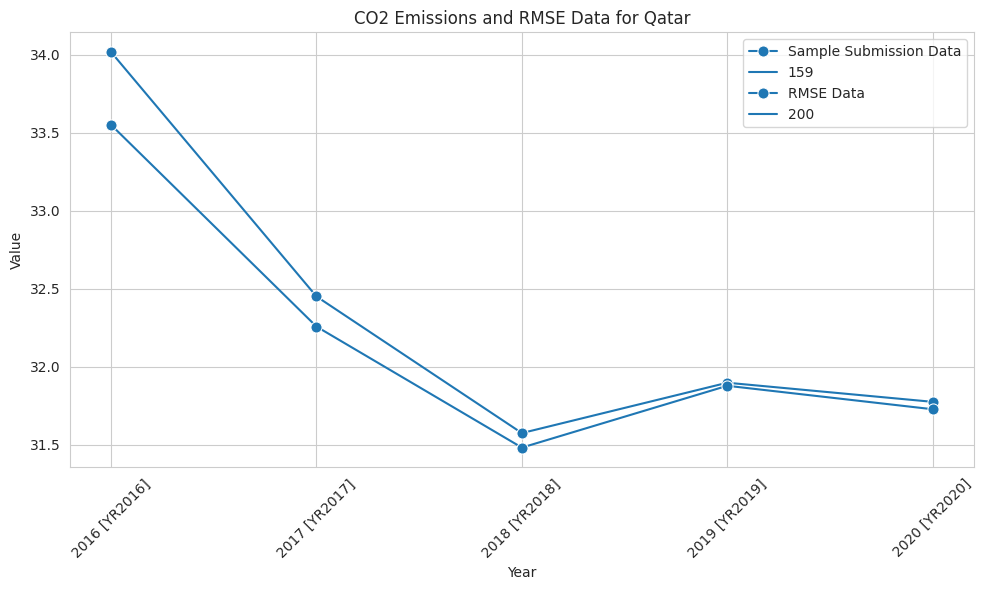

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the seaborn plots
sns.set_style("whitegrid")

# Plot afg1 and afg2 in the same figure
plt.figure(figsize=(10, 6))

# Plot afg1 with blue color
sns.lineplot(data=afg1.T, marker='o', markersize=8, label='Sample Submission Data', color='blue')

# Plot afg2 with orange color
sns.lineplot(data=afg2.T, marker='o', markersize=8, label='RMSE Data', color='orange')

plt.title("CO2 Emissions and RMSE Data for Qatar")
plt.xlabel("Year")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Country with Population   columns 

In [52]:





Population= train[[
    'Country Name',
#     'Access to electricity (% of population)',
#     'Agricultural land (% of land area)',
#     'Annual freshwater withdrawals, total (% of internal resources)',
#     'Arable land (% of land area)',
#     'Forest area (% of land area)',
#     'Electric power consumption (kWh per capita)',
#     'Energy use (kg of oil equivalent per capita)',
#     'Renewable electricity output (% of total electricity output)',
#     'Renewable energy consumption (% of total final energy consumption)',
    'Population growth (annual %)',
#     'GDP per capita (current US$)',
    'CO2 emissions (metric tons per capita)'
                                  
                                  
                                 ]]

Population = Population.dropna()

test_Population = final_test_df.drop(columns=[
    'Access to electricity (% of population)',
    'Agricultural land (% of land area)', 
    'Annual freshwater withdrawals, total (% of internal resources)',                         
    'Arable land (% of land area)', 'Forest area (% of land area)',                       
    'Electric power consumption (kWh per capita)', 
    'Energy use (kg of oil equivalent per capita)',
    'Renewable energy consumption (% of total final energy consumption)',
    'Renewable electricity output (% of total electricity output)',                   
#     'Population growth (annual %)',
    'GDP per capita (current US$)'                 
],axis =1 )
test_Population= test_Population.ffill()
test_Population = test_Population.bfill()

unique_values_Population = Population['Country Name'].unique()

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
import os
import joblib

# Create a folder named "gradient" to store the models if it doesn't exist
if not os.path.exists("gradient"):
    os.makedirs("gradient")

# Initialize an empty dictionary to store the trained models
trained_models = {}

# Iterate over unique countries
for country in unique_values_Population:
    try:
        # Filter data for the current country from the merged DataFrame
        country_data_train = Population[Population['Country Name'] == country].drop(['Country Name'], axis=1)
        co2_emissions_train = country_data_train['CO2 emissions (metric tons per capita)'].astype(float)
        country_data_train = country_data_train.drop(columns=['CO2 emissions (metric tons per capita)']).astype(float)
    
        # Filter test data for the current country from final_test_df
        country_data_test = test_Population[test_Population['Country Name'] == country]['Population growth (annual %)'].values.reshape(-1, 1)

        # Initialize the Gradient Boosting Regressor model
        model = GradientBoostingRegressor()

        # Train the model on the training data
        model.fit(country_data_train, co2_emissions_train)

        # Save the trained model in the "gradient" folder
        model_filename = f"gradient/{country}_gb_model.pkl"
        joblib.dump(model, model_filename)
        trained_models[country] = model_filename  # Store the filename for later use

        # Make predictions on the test data
        predictions = model.predict(country_data_test)

        # Find the row index in the sample_submission DataFrame
        row_index = sample_submission[sample_submission['Country Name'] == country].index[0]
        
        # Update the sample_submission DataFrame with the forecast values
        new_values = [country, predictions[0], predictions[1], predictions[2], predictions[3], predictions[4]]
        sample_submission.loc[row_index] = new_values
    except Exception as e:
        print(f"Error occurred for {country}: {e}")


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439:

In [192]:
for country in unique_values:
    country_data_train = Population[Population['Country Name'] == country].drop(['Country Name'], axis=1)

In [193]:
country_data_train

,Population growth (annual %),CO2 emissions (metric tons per capita)
5502,1.353162,3.951660
5503,1.334999,3.958089
5504,1.313657,3.961470
5505,1.289152,4.090082
5506,1.274941,4.223794
5507,1.263747,4.329790
5508,1.257648,4.417135
5509,1.242741,4.528275
5510,1.248568,4.503795
5511,1.238302,4.391451


In [88]:
sample_submission['2030 [YR2030]'] = submission['2030 [YR2030]'] 

In [89]:
sample_submission.to_csv('Population.csv',index=False)